<a href="https://colab.research.google.com/github/nbilasals/sentiment-qris/blob/main/2020_2024_Nabila_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Analysis of QRIS in Twitter

Sentiment analysis is like a cool way of analyzing text to figure out how people feel and what they think through the use of natural language processing. The whole point is to figure out whether the text is positive, negative, or neutral. This can be very helpful for businesses that want to know how happy their customers are or for experts who want to know how the public feels.

Analyzing tweets about QRIS and Bank Indonesia is important to grasp public sentiment. Knowing if the response is positive, negative, or neutral helps policymakers understand how well QRIS-related policies are received. This insight aids Bank Indonesia in making informed decisions based on public perception.

1. Understanding Public Opinion:
Sentiment analysis helps us figure out what people think about the rules Bank Indonesia has for QRIS. Are they happy, upset, or just okay with them? This helps the people who make these rules know what the public thinks and maybe change things if needed.

2. Checking How People Use QRIS:
We can see how regular folks and businesses use QRIS through tweets. If people are having problems or liking it, we can tell. This helps Bank Indonesia see if QRIS is working well or if it needs fixing.

3. Making Sure People Know About QRIS:
Sentiment analysis can tell us if people know about QRIS and understand it. If not, Bank Indonesia can teach them better and clear up any wrong ideas.

4. Spotting Problems Early:
By looking at tweets, we can find out if there are any big problems or worries about QRIS. If lots of people are upset, it means something might be wrong, and Bank Indonesia can fix it before it becomes a big issue.

5. Helping Bank Indonesia Decide:
Sentiment analysis gives information to help Bank Indonesia make important choices. If people like QRIS, that's good news. If not, it helps figure out what needs to change so everyone is happy with it.

In [182]:
!pip install Sastrawi

In [183]:
pip install textblob

In [184]:
import re
import pandas as pd
import numpy as np
import datetime as dt
import string
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix, classification_report
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
lm = nltk.WordNetLemmatizer()
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [185]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data

Given the privacy policy changes on Twitter, data gathering or scraping has limitations. The available data spans from February 2022 to February 2023. Analyzing this data provides a snapshot of public sentiment during that period regarding QRIS and Bank Indonesia.

We're using a powerful tool called BERT to understand what people are saying in comments about QRIS (Quick Response Code Indonesian Standard). BERT is like a language expert that's really good at grasping what words mean in different situations.

Now, there's a version of BERT called "Indo-BERT" that's specifically trained to understand Indonesian text. We're using this to teach the computer to figure out if comments are positive, negative, or neutral.

So, now we have labels on our data.

We take an extra step to make sure our computer is getting things right. After BERT processes the comments and assigns them a sentiment label (positive, negative, or neutral), I manually double-check these labels.

By doing this, we're making sure our analysis is accurate and reliable.

*******************************************************************************************
*******************************************************************************************

In [186]:
# Load kedua dataframe
df1 = pd.read_csv('/content/drive/MyDrive/menyala 🔥🔥/code/ver-1/cleaned-qris-2020.csv')
df2 = pd.read_csv('/content/drive/MyDrive/menyala 🔥🔥/code/ver-1/cleaned-text.csv')


# Data From July 2019-Aug 2020

In [187]:
df1

,Komentar,Sentiment,Score,clean_text,normalization,final_text,token,stop_text,stem_text
0,Dipakai Bayar Parkir QRIS Dapat Dongkrak Penda...,neutral,0.941333,dipakai bayar parkir qris dapat dongkrak penda...,dipakai bayar parkir qris dapat dongkrak penda...,dipakai bayar parkir qris dapat dongkrak penda...,"['dipakai', 'bayar', 'parkir', 'qris', 'dapat'...","['dipakai', 'bayar', 'parkir', 'qris', 'dongkr...",pakai bayar parkir qris dongkrak dapat daerah
1,1 Januari 2020 Bayar Nontunai Wajib Pakai QRIS...,neutral,0.996004,januari bayar nontunai wajib pakai qris apa itu,januari bayar nontunai wajib pakai qris apa itu,januari bayar nontunai wajib pakai qris,"['januari', 'bayar', 'nontunai', 'wajib', 'pak...","['januari', 'bayar', 'nontunai', 'wajib', 'pak...",januari bayar nontunai wajib pakai qris
2,Bayar Non Tunai Kian Mudah Tukang Bakso hingga...,neutral,0.978958,bayar non tunai kian mudah tukang bakso hingga...,bayar non tunai kian mudah tukang bakso hingga...,bayar tunai kian mudah tukang bakso hingga tu...,"['bayar', 'non', 'tunai', 'kian', 'mudah', 'tu...","['bayar', 'non', 'tunai', 'kian', 'mudah', 'tu...",bayar non tunai kian mudah tukang bakso turis ...
3,Bayar Non Tunai Kian Mudah Tukang Bakso hingga...,neutral,0.978586,bayar non tunai kian mudah tukang bakso hingga...,bayar non tunai kian mudah tukang bakso hingga...,bayar tunai kian mudah tukang bakso hingga tu...,"['bayar', 'non', 'tunai', 'kian', 'mudah', 'tu...","['bayar', 'non', 'tunai', 'kian', 'mudah', 'tu...",bayar non tunai kian mudah tukang bakso turis ...
4,Dipakai Bayar Parkir QRIS Bisa Dongkrak Pendap...,neutral,0.976872,dipakai bayar parkir qris bisa dongkrak pendap...,dipakai bayar parkir qris bisa dongkrak pendap...,dipakai bayar parkir qris bisa dongkrak pendap...,"['dipakai', 'bayar', 'parkir', 'qris', 'bisa',...","['dipakai', 'bayar', 'parkir', 'qris', 'dongkr...",pakai bayar parkir qris dongkrak dapat daerah
...,...,...,...,...,...,...,...,...,...
922,Pertama kali payment pakai qris @JeniusConnect...,neutral,0.738048,pertama kali payment pakai qris mudah,pertama kali payment pakai qris mudah,pertama kali payment pakai qris mudah,"['pertama', 'kali', 'payment', 'pakai', 'qris'...","['kali', 'payment', 'pakai', 'qris', 'mudah']",kali payment pakai qris mudah
923,Makin banyak merchant. Sudah semua pakai QRIS ...,neutral,0.625520,makin banyak merchant sudah semua pakai qris t...,makin banyak merchant sudah semua pakai qris t...,makin banyak merchant sudah semua pakai qris t...,"['makin', 'banyak', 'merchant', 'sudah', 'semu...","['merchant', 'pakai', 'qris']",merchant pakai qris
924,Bank Mandiri Dorong Bayar Zakat hingga Wakaf P...,neutral,0.996674,bank mandiri dorong bayar zakat hingga wakaf p...,bank mandiri dorong bayar zakat hingga wakaf p...,bank mandiri dorong bayar zakat hingga wakaf p...,"['bank', 'mandiri', 'dorong', 'bayar', 'zakat'...","['bank', 'mandiri', 'dorong', 'bayar', 'zakat'...",bank mandiri dorong bayar zakat wakaf pakai qris
925,Bank Indonesia gunakan QRIS untuk transaksi di...,neutral,0.997834,bank indonesia gunakan qris untuk transaksi di...,bank indonesia gunakan qris untuk transaksi di...,bank indonesia gunakan qris untuk transaksi p...,"['bank', 'indonesia', 'gunakan', 'qris', 'untu...","['bank', 'indonesia', 'qris', 'transaksi', 'pa...",bank indonesia qris transaksi pasar apung sist...


In [188]:
df1['Sentiment'].value_counts()

Sentiment
neutral     810
positive     91
negative     26
Name: count, dtype: int64

<ipython-input-189-4832e4c2799c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Sentiment', data=df1, palette="pastel")


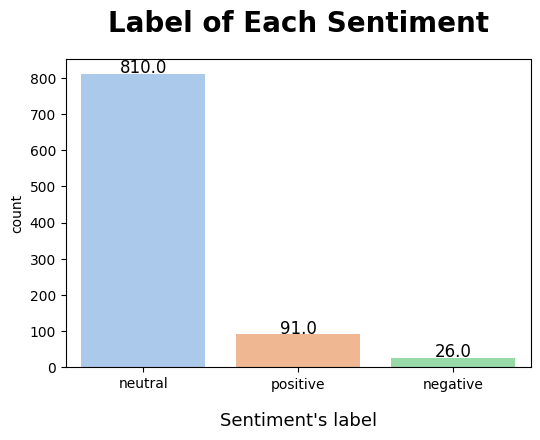

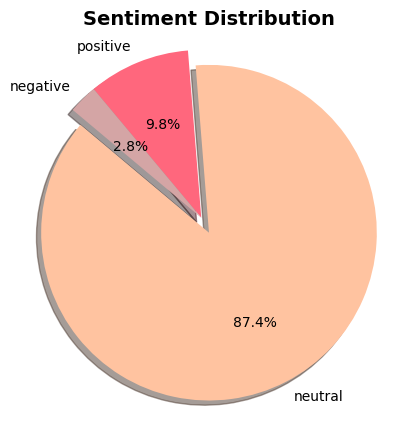

In [189]:
# membuat visualisasi bar chart untuk menampilkan jumlah sentimen netral, positif dan negatif

fig, ax = plt.subplots(figsize=(6,4))
ax = sns.countplot(x='Sentiment', data=df1, palette="pastel")

for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 3.25,rect.get_height(),horizontalalignment='center', fontsize = 12)

plt.title("Label of Each Sentiment", fontsize=20, fontweight='bold',pad=20)
plt.xlabel("Sentiment's label", fontsize=13, labelpad=15)
plt.ylim(0)
plt.show()

# Define data for the pie chart
# Get the value counts of sentiment labels in your DataFrame
sentiment_counts = df1['Sentiment'].value_counts().to_dict()
labels = sentiment_counts.keys()
sizes = sentiment_counts.values()
colors = ['#FFC3A0', '#FF677D', '#D4A5A5']  # You can customize the colors
explode = (0.1, 0, 0)  # Explode the 1st slice (Positive)

# Create a pie chart
fig, ax = plt.subplots(figsize=(5,5))
ax.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
       shadow=True, startangle=140)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title("Sentiment Distribution", fontsize=14, fontweight='bold')
plt.show()

# Data From Feb 2023-April 2024

In [190]:
df2

,Komentar,Sentiment,Score,clean_text,normalization,final_text,token,stop_text,stem_text
0,@Marimadesi Verifikasi data via OTP &gt QRIS ...,neutral,0.993306,verifikasi data via otp gt qris kartu kredit s...,verifikasi data melalui one time password begi...,verifikasi data melalui time password begitu ...,"['verifikasi', 'data', 'melalui', 'time', 'pas...","['verifikasi', 'data', 'time', 'password', 'qr...",verifikasi data time password qris kartu kredi...
1,"@monicayuna Syarat dan ketentuan pilih Setuju""...",neutral,0.992211,syarat dan ketentuan pilih setuju gt isi data ...,syarat dan ketentuan pilih setuju begitu isi d...,syarat ketentuan pilih setuju begitu data d...,"['syarat', 'ketentuan', 'pilih', 'setuju', 'be...","['syarat', 'ketentuan', 'pilih', 'setuju', 'da...",syarat tentu pilih tuju data date tanggal lahi...
2,@gitayamara Verifikasi data via OTP &gt QRIS ...,neutral,0.994890,verifikasi data via otp gt qris kartu kredit s...,verifikasi data melalui one time password begi...,verifikasi data melalui time password begitu ...,"['verifikasi', 'data', 'melalui', 'time', 'pas...","['verifikasi', 'data', 'time', 'password', 'qr...",verifikasi data time password qris kartu kredi...
3,@danawallet udah 2x24 jam lebih masalah saya d...,negative,0.992498,udah x jam lebih masalah saya dan masih banyak...,sudah x jam lebih masalah saya dan masih banya...,sudah lebih masalah saya masih banyak lagi ...,"['sudah', 'lebih', 'masalah', 'saya', 'masih',...","['pelanggan', 'terselesaikan', 'tujuan', 'tran...",langgan selesai tuju transaksi bodong qris kom...
4,"@triyuni287 Syarat dan ketentuan pilih Setuju""...",neutral,0.993935,syarat dan ketentuan pilih setuju gt isi data ...,syarat dan ketentuan pilih setuju begitu isi d...,syarat ketentuan pilih setuju begitu data d...,"['syarat', 'ketentuan', 'pilih', 'setuju', 'be...","['syarat', 'ketentuan', 'pilih', 'setuju', 'da...",syarat tentu pilih tuju data date tanggal lahi...
...,...,...,...,...,...,...,...,...,...
6517,Gue merasa lebih terhubung dengan dunia digita...,positive,0.677520,gue merasa lebih terhubung dengan dunia digita...,saya merasa lebih terhubung dengan dunia digit...,saya merasa lebih terhubung dengan dunia digit...,"['saya', 'merasa', 'lebih', 'terhubung', 'deng...","['terhubung', 'dunia', 'digital', 'berkat', 'q...",hubung dunia digital berkat qris
6518,"QRIS membantu mengurangi limbah kertas struk, ...",positive,0.977578,qris membantu mengurangi limbah kertas struk l...,qris membantu mengurangi limbah kertas struk l...,qris membantu mengurangi limbah kertas struk l...,"['qris', 'membantu', 'mengurangi', 'limbah', '...","['qris', 'membantu', 'mengurangi', 'limbah', '...",qris bantu kurang limbah kertas struk lingkung...
6519,Keamanan QRIS itu sangat penting dalam transak...,positive,0.838305,keamanan qris itu sangat penting dalam transak...,keamanan qris itu sangat penting dalam transak...,keamanan qris sangat penting dalam transaksi ...,"['keamanan', 'qris', 'sangat', 'penting', 'dal...","['keamanan', 'qris', 'transaksi', 'dijaga']",aman qris transaksi jaga
6520,"Kadang-kadang QRIS bikin ribet, harus diperbai...",negative,0.974707,kadangkadang qris bikin ribet harus diperbaiki...,kadangkadang qris bikin rumit harus di perbaik...,kadangkadang qris bikin rumit harus perbaiki ...,"['kadangkadang', 'qris', 'bikin', 'rumit', 'ha...","['kadangkadang', 'qris', 'bikin', 'rumit', 'pe...",kadangkadang qris bikin rumit baik


In [191]:
df2['Sentiment'].value_counts()

Sentiment
neutral     4823
negative     973
positive     726
Name: count, dtype: int64

<ipython-input-192-66a1b86b7349>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Sentiment', data=df2, palette="pastel")


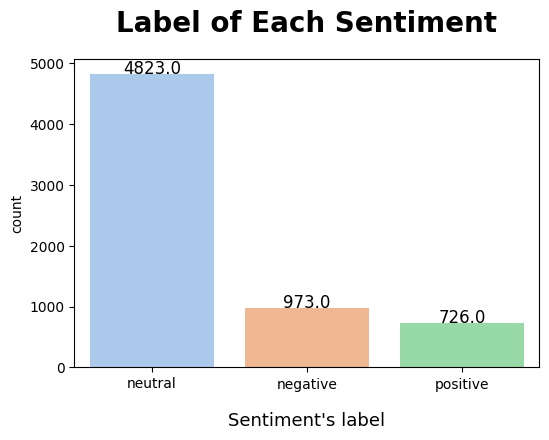

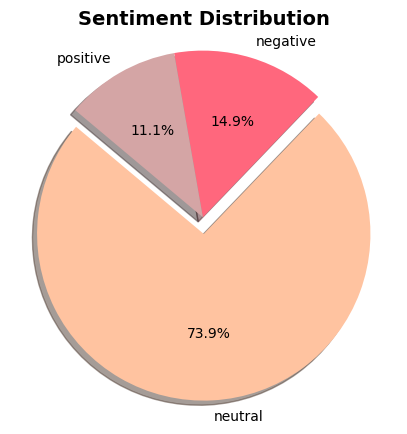

In [192]:
# membuat visualisasi bar chart untuk menampilkan jumlah sentimen netral, positif dan negatif

fig, ax = plt.subplots(figsize=(6,4))
ax = sns.countplot(x='Sentiment', data=df2, palette="pastel")

for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 3.25,rect.get_height(),horizontalalignment='center', fontsize = 12)

plt.title("Label of Each Sentiment", fontsize=20, fontweight='bold',pad=20)
plt.xlabel("Sentiment's label", fontsize=13, labelpad=15)
plt.ylim(0)
plt.show()

# Define data for the pie chart
# Get the value counts of sentiment labels in your DataFrame
sentiment_counts = df2['Sentiment'].value_counts().to_dict()
labels = sentiment_counts.keys()
sizes = sentiment_counts.values()
colors = ['#FFC3A0', '#FF677D', '#D4A5A5']  # You can customize the colors
explode = (0.1, 0, 0)  # Explode the 1st slice (Positive)

# Create a pie chart
fig, ax = plt.subplots(figsize=(5,5))
ax.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
       shadow=True, startangle=140)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title("Sentiment Distribution", fontsize=14, fontweight='bold')
plt.show()

# DataFrame

In [193]:
# Gabungin kedua dataframe
df = pd.concat([df1, df2], ignore_index=True)
df

,Komentar,Sentiment,Score,clean_text,normalization,final_text,token,stop_text,stem_text
0,Dipakai Bayar Parkir QRIS Dapat Dongkrak Penda...,neutral,0.941333,dipakai bayar parkir qris dapat dongkrak penda...,dipakai bayar parkir qris dapat dongkrak penda...,dipakai bayar parkir qris dapat dongkrak penda...,"['dipakai', 'bayar', 'parkir', 'qris', 'dapat'...","['dipakai', 'bayar', 'parkir', 'qris', 'dongkr...",pakai bayar parkir qris dongkrak dapat daerah
1,1 Januari 2020 Bayar Nontunai Wajib Pakai QRIS...,neutral,0.996004,januari bayar nontunai wajib pakai qris apa itu,januari bayar nontunai wajib pakai qris apa itu,januari bayar nontunai wajib pakai qris,"['januari', 'bayar', 'nontunai', 'wajib', 'pak...","['januari', 'bayar', 'nontunai', 'wajib', 'pak...",januari bayar nontunai wajib pakai qris
2,Bayar Non Tunai Kian Mudah Tukang Bakso hingga...,neutral,0.978958,bayar non tunai kian mudah tukang bakso hingga...,bayar non tunai kian mudah tukang bakso hingga...,bayar tunai kian mudah tukang bakso hingga tu...,"['bayar', 'non', 'tunai', 'kian', 'mudah', 'tu...","['bayar', 'non', 'tunai', 'kian', 'mudah', 'tu...",bayar non tunai kian mudah tukang bakso turis ...
3,Bayar Non Tunai Kian Mudah Tukang Bakso hingga...,neutral,0.978586,bayar non tunai kian mudah tukang bakso hingga...,bayar non tunai kian mudah tukang bakso hingga...,bayar tunai kian mudah tukang bakso hingga tu...,"['bayar', 'non', 'tunai', 'kian', 'mudah', 'tu...","['bayar', 'non', 'tunai', 'kian', 'mudah', 'tu...",bayar non tunai kian mudah tukang bakso turis ...
4,Dipakai Bayar Parkir QRIS Bisa Dongkrak Pendap...,neutral,0.976872,dipakai bayar parkir qris bisa dongkrak pendap...,dipakai bayar parkir qris bisa dongkrak pendap...,dipakai bayar parkir qris bisa dongkrak pendap...,"['dipakai', 'bayar', 'parkir', 'qris', 'bisa',...","['dipakai', 'bayar', 'parkir', 'qris', 'dongkr...",pakai bayar parkir qris dongkrak dapat daerah
...,...,...,...,...,...,...,...,...,...
7444,Gue merasa lebih terhubung dengan dunia digita...,positive,0.677520,gue merasa lebih terhubung dengan dunia digita...,saya merasa lebih terhubung dengan dunia digit...,saya merasa lebih terhubung dengan dunia digit...,"['saya', 'merasa', 'lebih', 'terhubung', 'deng...","['terhubung', 'dunia', 'digital', 'berkat', 'q...",hubung dunia digital berkat qris
7445,"QRIS membantu mengurangi limbah kertas struk, ...",positive,0.977578,qris membantu mengurangi limbah kertas struk l...,qris membantu mengurangi limbah kertas struk l...,qris membantu mengurangi limbah kertas struk l...,"['qris', 'membantu', 'mengurangi', 'limbah', '...","['qris', 'membantu', 'mengurangi', 'limbah', '...",qris bantu kurang limbah kertas struk lingkung...
7446,Keamanan QRIS itu sangat penting dalam transak...,positive,0.838305,keamanan qris itu sangat penting dalam transak...,keamanan qris itu sangat penting dalam transak...,keamanan qris sangat penting dalam transaksi ...,"['keamanan', 'qris', 'sangat', 'penting', 'dal...","['keamanan', 'qris', 'transaksi', 'dijaga']",aman qris transaksi jaga
7447,"Kadang-kadang QRIS bikin ribet, harus diperbai...",negative,0.974707,kadangkadang qris bikin ribet harus diperbaiki...,kadangkadang qris bikin rumit harus di perbaik...,kadangkadang qris bikin rumit harus perbaiki ...,"['kadangkadang', 'qris', 'bikin', 'rumit', 'ha...","['kadangkadang', 'qris', 'bikin', 'rumit', 'pe...",kadangkadang qris bikin rumit baik


In [194]:
df.columns

Index(['Komentar', 'Sentiment', 'Score', 'clean_text', 'normalization',
       'final_text', 'token', 'stop_text', 'stem_text'],
      dtype='object')

In [195]:
data = df[['stem_text', 'Sentiment']]

In [196]:
data

,stem_text,Sentiment
0,pakai bayar parkir qris dongkrak dapat daerah,neutral
1,januari bayar nontunai wajib pakai qris,neutral
2,bayar non tunai kian mudah tukang bakso turis ...,neutral
3,bayar non tunai kian mudah tukang bakso turis ...,neutral
4,pakai bayar parkir qris dongkrak dapat daerah,neutral
...,...,...
7444,hubung dunia digital berkat qris,positive
7445,qris bantu kurang limbah kertas struk lingkung...,positive
7446,aman qris transaksi jaga,positive
7447,kadangkadang qris bikin rumit baik,negative


In [197]:
data['Sentiment'].value_counts()

Sentiment
neutral     5633
negative     999
positive     817
Name: count, dtype: int64

In [198]:
data['Sentiment'].fillna(0, inplace=True)

<ipython-input-198-dd21e69e3a82>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Sentiment'].fillna(0, inplace=True)


## Changing sentiment values into numbers

In [199]:
data['Sentiment'] = data['Sentiment'].replace({'positive': 2, 'neutral': 0, 'negative': 1}).astype(int)

<ipython-input-199-eb564b29a66a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Sentiment'] = data['Sentiment'].replace({'positive': 2, 'neutral': 0, 'negative': 1}).astype(int)


In [200]:
# Use .loc to modify the DataFrame
data.loc[:, 'Sentiment'] = data['Sentiment'].replace({'positive': 2, 'neutral': 0, 'negative': 1}).astype(int)

In [201]:
data['stem_text'] = data['stem_text'].fillna('')

<ipython-input-201-1db798bfe34a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['stem_text'] = data['stem_text'].fillna('')


## Split the text into X and y

In [202]:
X = data['stem_text']
y = data['Sentiment']

In [203]:
# X_train, X_test, y_train, y_test = train_test_split(X, y,
#                                                     test_size=0.2,
#                                                     random_state=25)

## Vectorization

In [215]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# vectorizer = TfidfVectorizer(use_idf=True, smooth_idf=False, max_features=200000)
# vectorizer.fit(X_train)
# print('No. of feature_words: ', len(vectorizer.get_feature_names_out()))

# X_train = vectorizer.transform(X_train)
# X_test = vectorizer.transform(X_test)

No. of feature_words:  8743


# Modeling Logistic Regression

In [213]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

def evaluate_model(X_train_tfidf, X_test_tfidf, y_train, y_test):
    # Train logistic regression model
    model = LogisticRegression()
    model.fit(X_train_tfidf, y_train)

    # Predict and evaluate
    y_pred = model.predict(X_test_tfidf)
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    return cm, report

# Vectorize text data
vectorizer = TfidfVectorizer(use_idf=True, smooth_idf=False, max_features=200000)
vectorizer.fit(X)
X_tfidf = vectorizer.transform(X)

# Define test sizes for the desired splits
test_sizes = [0.1, 0.2, 0.3, 0.4]

# Evaluate the model with different splits
results = {}
for test_size in test_sizes:
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=test_size, random_state=42)

    # Evaluate model
    cm, report = evaluate_model(X_train, X_test, y_train, y_test)

    # Store results
    results[test_size] = {
        'confusion_matrix': cm,
        'classification_report': report
    }

    # Print results for the current test size
    print(f"Test Size {test_size*100:.0f}%")
    print("Confusion Matrix:")
    print(cm)
    print("Classification Report:")
    print(report)
    print("\n")

Test Size 10%
Confusion Matrix:
[[563   5   7]
 [ 74  28   1]
 [ 40   1  26]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.98      0.90       575
           1       0.82      0.27      0.41       103
           2       0.76      0.39      0.51        67

    accuracy                           0.83       745
   macro avg       0.81      0.55      0.61       745
weighted avg       0.82      0.83      0.80       745



Test Size 20%
Confusion Matrix:
[[1113   11   16]
 [ 145   50    5]
 [  94    5   51]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.98      0.89      1140
           1       0.76      0.25      0.38       200
           2       0.71      0.34      0.46       150

    accuracy                           0.81      1490
   macro avg       0.76      0.52      0.58      1490
weighted avg       0.80      0.81      0.78      1490



Test Size 30%
Confusion

# Using The Best Size

In [217]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=25)


In [218]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(use_idf=True, smooth_idf=False, max_features=200000)
vectorizer.fit(X_train)
print('No. of feature_words: ', len(vectorizer.get_feature_names_out()))

X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)

No. of feature_words:  8743


In [224]:
# Define class weights
class_weights = {
    0: 1.0,  # Majority class
    1: 5633 / 999,  # Adjusted for class imbalance
    2: 5633 / 817   # Adjusted for class imbalance
}

In [225]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer

logModel = LogisticRegression(multi_class='multinomial',
                              solver='lbfgs',
                              max_iter=1000,
                              penalty ='l2',
                              C=4,
                              class_weight=class_weights
                             )

# Train the model
logModel.fit(X_train, y_train)


LogisticRegression(C=4,
                   class_weight={0: 1.0, 1: 5.638638638638638,
                                 2: 6.894736842105263},
                   max_iter=1000, multi_class='multinomial')

In [226]:
y_pred = logModel.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate classification report
report = classification_report(y_test, y_pred)

# Print classification report
print("Classification Report:")
print(report)


Accuracy: 0.7946308724832215
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.85      0.87       564
           1       0.58      0.57      0.57        98
           2       0.50      0.66      0.57        83

    accuracy                           0.79       745
   macro avg       0.66      0.70      0.67       745
weighted avg       0.81      0.79      0.80       745



# Handling Imbalance

In [231]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to oversample the minority classes
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [232]:
# Train logistic regression model on the oversampled data
model = LogisticRegression()
model.fit(X_train_smote, y_train_smote)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print results
print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(report)

Confusion Matrix:
[[467  49  48]
 [ 30  57  11]
 [ 23   6  54]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.83      0.86       564
           1       0.51      0.58      0.54        98
           2       0.48      0.65      0.55        83

    accuracy                           0.78       745
   macro avg       0.63      0.69      0.65       745
weighted avg       0.80      0.78      0.79       745



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
'''function to downsample'''

def downSample(data, class_label, num_samples):
    class_indices = df.index[df['Sentiment'] == class_label]
    remove_indices = np.random.choice(class_indices, num_samples, replace=False)
    return df.drop(index=remove_indices)

'''call function to downsample neutral class '''

dataFinal = downSample(data, 'neutral' , 4000)


### finetuning

In [ ]:
import joblib
import pickle

# Save the model
joblib.dump(logModel, 'model.joblib')

pickle.dump(vectorizer, open("/tokenizer.pkl", "wb"))

In [ ]:
with open('tokenizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)